In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Price': np.random.normal(50000, 5000, 100),
    'Volume': np.random.randint(10000000, 50000000, 100),
    'SeniorCitizen': np.random.choice([0, 1], 100, p=[0.7, 0.3]),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Churn': np.random.choice([0, 1], 100, p=[0.8, 0.2]),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], 100),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], 100)
}

In [3]:
df = pd.DataFrame(data)
df

,Date,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract
0,2023-01-01,48516.342953,12758676,0,Female,0,DSL,Month-to-month
1,2023-01-02,46125.735447,28593710,0,Female,0,DSL,Two year
2,2023-01-03,48977.755251,37631371,1,Male,0,DSL,Month-to-month
3,2023-01-04,47298.214194,42674600,0,Male,1,DSL,Month-to-month
4,2023-01-05,45991.484885,27306889,0,Male,0,No,One year
...,...,...,...,...,...,...,...,...
95,2023-04-06,55776.143769,42996184,0,Male,1,DSL,Month-to-month
96,2023-04-07,57243.998126,33698012,1,Female,0,DSL,Two year
97,2023-04-08,49427.232692,47968418,0,Male,0,No,Two year
98,2023-04-09,48337.665445,41552044,1,Male,0,Fiber optic,Two year


In [4]:
df.set_index('Date', inplace=True)
df.head()

,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract
Date,,,,,,,
2023-01-01,48516.342953,12758676,0,Female,0,DSL,Month-to-month
2023-01-02,46125.735447,28593710,0,Female,0,DSL,Two year
2023-01-03,48977.755251,37631371,1,Male,0,DSL,Month-to-month
2023-01-04,47298.214194,42674600,0,Male,1,DSL,Month-to-month
2023-01-05,45991.484885,27306889,0,Male,0,No,One year


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-01-01 to 2023-04-10
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            100 non-null    float64
 1   Volume           100 non-null    int32  
 2   SeniorCitizen    100 non-null    int64  
 3   Gender           100 non-null    object 
 4   Churn            100 non-null    int64  
 5   InternetService  100 non-null    object 
 6   Contract         100 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 5.9+ KB


In [6]:
df.columns

Index(['Price', 'Volume', 'SeniorCitizen', 'Gender', 'Churn',
       'InternetService', 'Contract'],
      dtype='object')

In [7]:
df[df['Price'] > 5000]

,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract
Date,,,,,,,
2023-01-01,48516.342953,12758676,0,Female,0,DSL,Month-to-month
2023-01-02,46125.735447,28593710,0,Female,0,DSL,Two year
2023-01-03,48977.755251,37631371,1,Male,0,DSL,Month-to-month
2023-01-04,47298.214194,42674600,0,Male,1,DSL,Month-to-month
2023-01-05,45991.484885,27306889,0,Male,0,No,One year
...,...,...,...,...,...,...,...
2023-04-06,55776.143769,42996184,0,Male,1,DSL,Month-to-month
2023-04-07,57243.998126,33698012,1,Female,0,DSL,Two year
2023-04-08,49427.232692,47968418,0,Male,0,No,Two year


In [8]:
df['Price_Category'] = df['Price'].apply(
    lambda x: 'Low' if x < 48000 else ('Medium' if x <= 52000 else 'High')
)
df.head()

,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract,Price_Category
Date,,,,,,,,
2023-01-01,48516.342953,12758676,0,Female,0,DSL,Month-to-month,Medium
2023-01-02,46125.735447,28593710,0,Female,0,DSL,Two year,Low
2023-01-03,48977.755251,37631371,1,Male,0,DSL,Month-to-month,Medium
2023-01-04,47298.214194,42674600,0,Male,1,DSL,Month-to-month,Low
2023-01-05,45991.484885,27306889,0,Male,0,No,One year,Low


In [9]:
conditions = [
    df['Price'] < 48000,
    df['Price'] <= 52000
]
choices = [
    'Low', 'Medium'
]

df['Price_Level'] = np.select(conditions, choices, default='High')
df.head(2)

,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract,Price_Category,Price_Level
Date,,,,,,,,,
2023-01-01,48516.342953,12758676,0,Female,0,DSL,Month-to-month,Medium,Medium
2023-01-02,46125.735447,28593710,0,Female,0,DSL,Two year,Low,Low


In [10]:
conditions = [
    df['Volume'] <= 30000000
]
choices = ['Low']

df['High_Volume'] = np.select(conditions, choices, default='High')
df.head()

,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract,Price_Category,Price_Level,High_Volume
Date,,,,,,,,,,
2023-01-01,48516.342953,12758676,0,Female,0,DSL,Month-to-month,Medium,Medium,Low
2023-01-02,46125.735447,28593710,0,Female,0,DSL,Two year,Low,Low,Low
2023-01-03,48977.755251,37631371,1,Male,0,DSL,Month-to-month,Medium,Medium,High
2023-01-04,47298.214194,42674600,0,Male,1,DSL,Month-to-month,Low,Low,High
2023-01-05,45991.484885,27306889,0,Male,0,No,One year,Low,Low,Low


In [11]:
condition = [
    (df['Churn'] == 0) & (df['SeniorCitizen'] == 0),
    (df['Churn'] == 0) & (df['SeniorCitizen'] == 1)
]
choices = ['Low', 'Medium']

df['Churn_Risk'] = np.select(condition, choices, default="Hidh")
df.head()

,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract,Price_Category,Price_Level,High_Volume,Churn_Risk
Date,,,,,,,,,,,
2023-01-01,48516.342953,12758676,0,Female,0,DSL,Month-to-month,Medium,Medium,Low,Low
2023-01-02,46125.735447,28593710,0,Female,0,DSL,Two year,Low,Low,Low,Low
2023-01-03,48977.755251,37631371,1,Male,0,DSL,Month-to-month,Medium,Medium,High,Medium
2023-01-04,47298.214194,42674600,0,Male,1,DSL,Month-to-month,Low,Low,High,Hidh
2023-01-05,45991.484885,27306889,0,Male,0,No,One year,Low,Low,Low,Low


In [12]:
condition = [
    df['InternetService'] == 'DSL',
    df['InternetService'] == 'Fiber'
]
choices=['Basic', 'Advdnced']

df['Service_Type'] = np.select(condition, choices, default='No')
df.head()

,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract,Price_Category,Price_Level,High_Volume,Churn_Risk,Service_Type
Date,,,,,,,,,,,,
2023-01-01,48516.342953,12758676,0,Female,0,DSL,Month-to-month,Medium,Medium,Low,Low,Basic
2023-01-02,46125.735447,28593710,0,Female,0,DSL,Two year,Low,Low,Low,Low,Basic
2023-01-03,48977.755251,37631371,1,Male,0,DSL,Month-to-month,Medium,Medium,High,Medium,Basic
2023-01-04,47298.214194,42674600,0,Male,1,DSL,Month-to-month,Low,Low,High,Hidh,Basic
2023-01-05,45991.484885,27306889,0,Male,0,No,One year,Low,Low,Low,Low,No


In [13]:
condition = [
    (df['Price'] < 50000) & (df['Volume'] < 30000000),
    (df['Price'] > 50000) | (df['Volume'] > 30000000),
    (df['Price'] > 50000) & (df['Volume'] > 30000000)
]

choice = ['Stable', 'Volatile', 'Extreme']

df['Market_Status'] = np.select(condition, choice, default='Unknown')
df[['Price', 'Volume', 'Market_Status']].head(2)

,Price,Volume,Market_Status
Date,,,
2023-01-01,48516.342953,12758676,Stable
2023-01-02,46125.735447,28593710,Stable


In [14]:
condition = [
    df['Churn'] == 1
]
choice = [df['Price'] * 1.1]

df['Adjusted_Price'] = np.select(condition, choice, default=df['Price'])
df.head(2)

,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract,Price_Category,Price_Level,High_Volume,Churn_Risk,Service_Type,Market_Status,Adjusted_Price
Date,,,,,,,,,,,,,,
2023-01-01,48516.342953,12758676,0,Female,0,DSL,Month-to-month,Medium,Medium,Low,Low,Basic,Stable,48516.342953
2023-01-02,46125.735447,28593710,0,Female,0,DSL,Two year,Low,Low,Low,Low,Basic,Stable,46125.735447


In [15]:
condition = [
    df['Contract'] == 'One year',
    df['Contract'] == 'Month-to-month'
]

choice = ['Short', 'Medium']

df['Contract_Duration'] = np.select(condition, choice, default='Long')
df.tail(2)

,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract,Price_Category,Price_Level,High_Volume,Churn_Risk,Service_Type,Market_Status,Adjusted_Price,Contract_Duration
Date,,,,,,,,,,,,,,,
2023-04-09,48337.665445,41552044,1,Male,0,Fiber optic,Two year,Medium,Medium,High,Medium,No,Volatile,48337.665445,Long
2023-04-10,57988.068432,11002245,1,Female,0,Fiber optic,Two year,High,High,Low,Medium,No,Volatile,57988.068432,Long


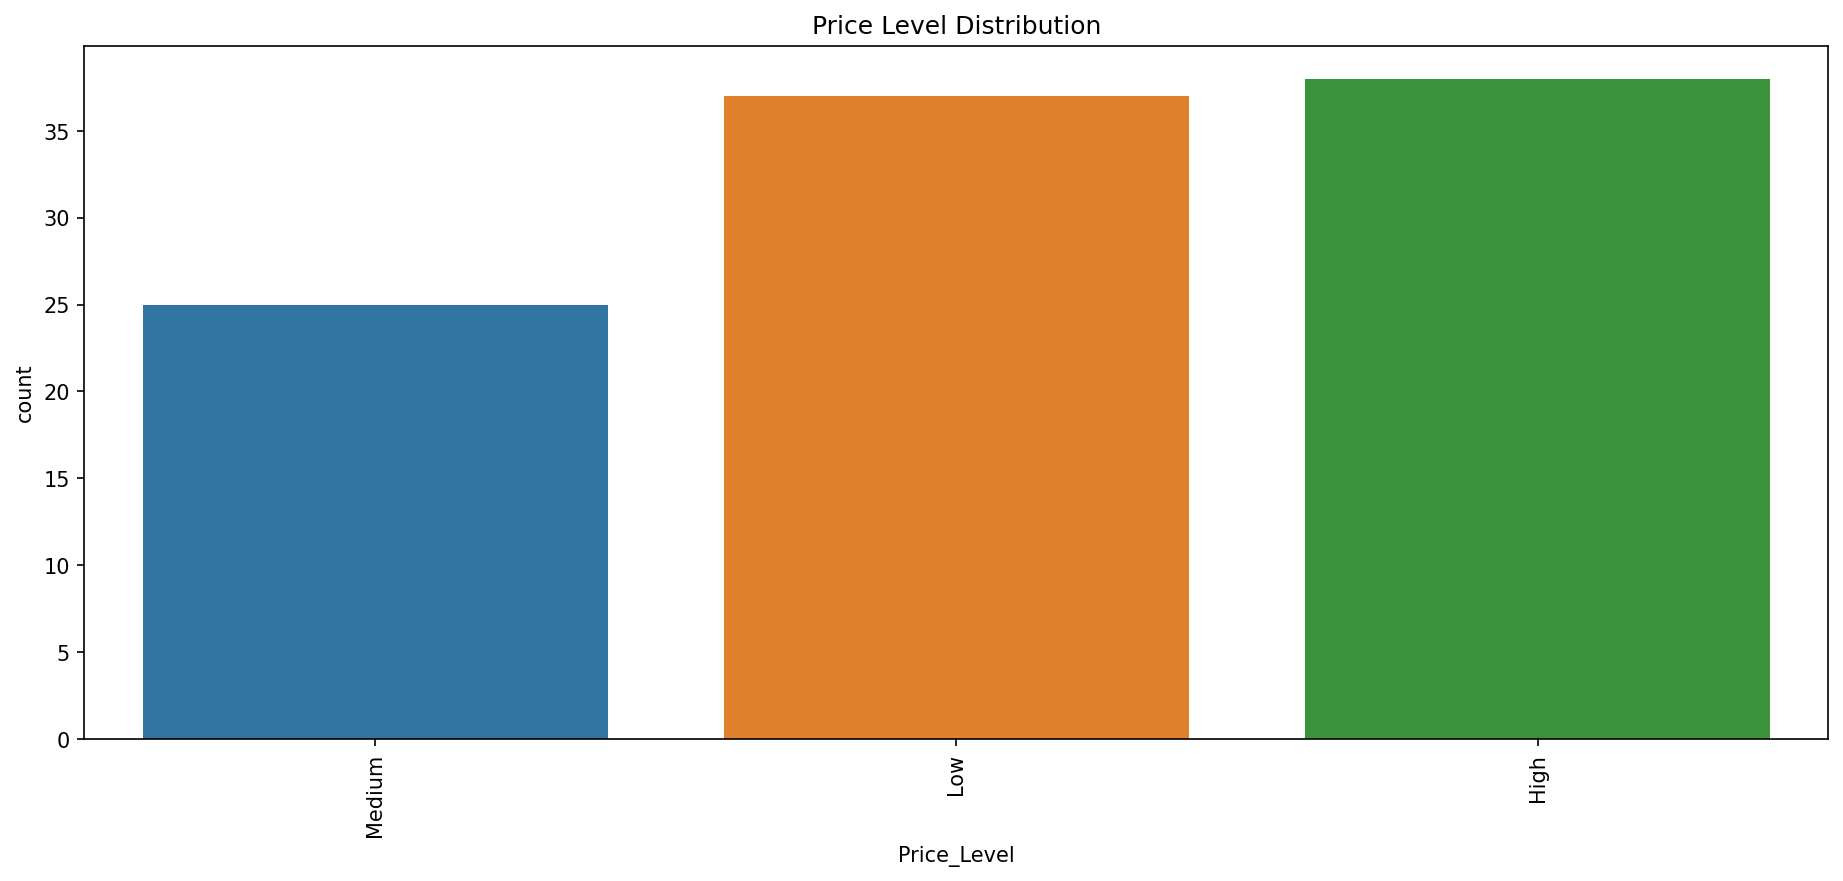

In [16]:
plt.figure(figsize=(15, 6), dpi=150)
sns.countplot(data=df, x="Price_Level", hue='Price_Level', )

plt.title('Price Level Distribution')
plt.xticks(rotation=90)
plt.show()

In [17]:
dummy_df = pd.get_dummies(df[['Gender', 'Contract', 'Churn']], drop_first=True).astype(int)
churn_corr = dummy_df.corr()['Churn']

conditions = [
    (df['SeniorCitizen'] == 0) & (df['Churn'] == 0),
    (df['SeniorCitizen'] == 1) & (df['Churn'] == 0)
]
choices = ['Low', 'Medium']

df['Churn_Impact'] = np.select(conditions, choices, default='High')
df.head(2)

,Price,Volume,SeniorCitizen,Gender,Churn,InternetService,Contract,Price_Category,Price_Level,High_Volume,Churn_Risk,Service_Type,Market_Status,Adjusted_Price,Contract_Duration,Churn_Impact
Date,,,,,,,,,,,,,,,,
2023-01-01,48516.342953,12758676,0,Female,0,DSL,Month-to-month,Medium,Medium,Low,Low,Basic,Stable,48516.342953,Medium,Low
2023-01-02,46125.735447,28593710,0,Female,0,DSL,Two year,Low,Low,Low,Low,Basic,Stable,46125.735447,Long,Low


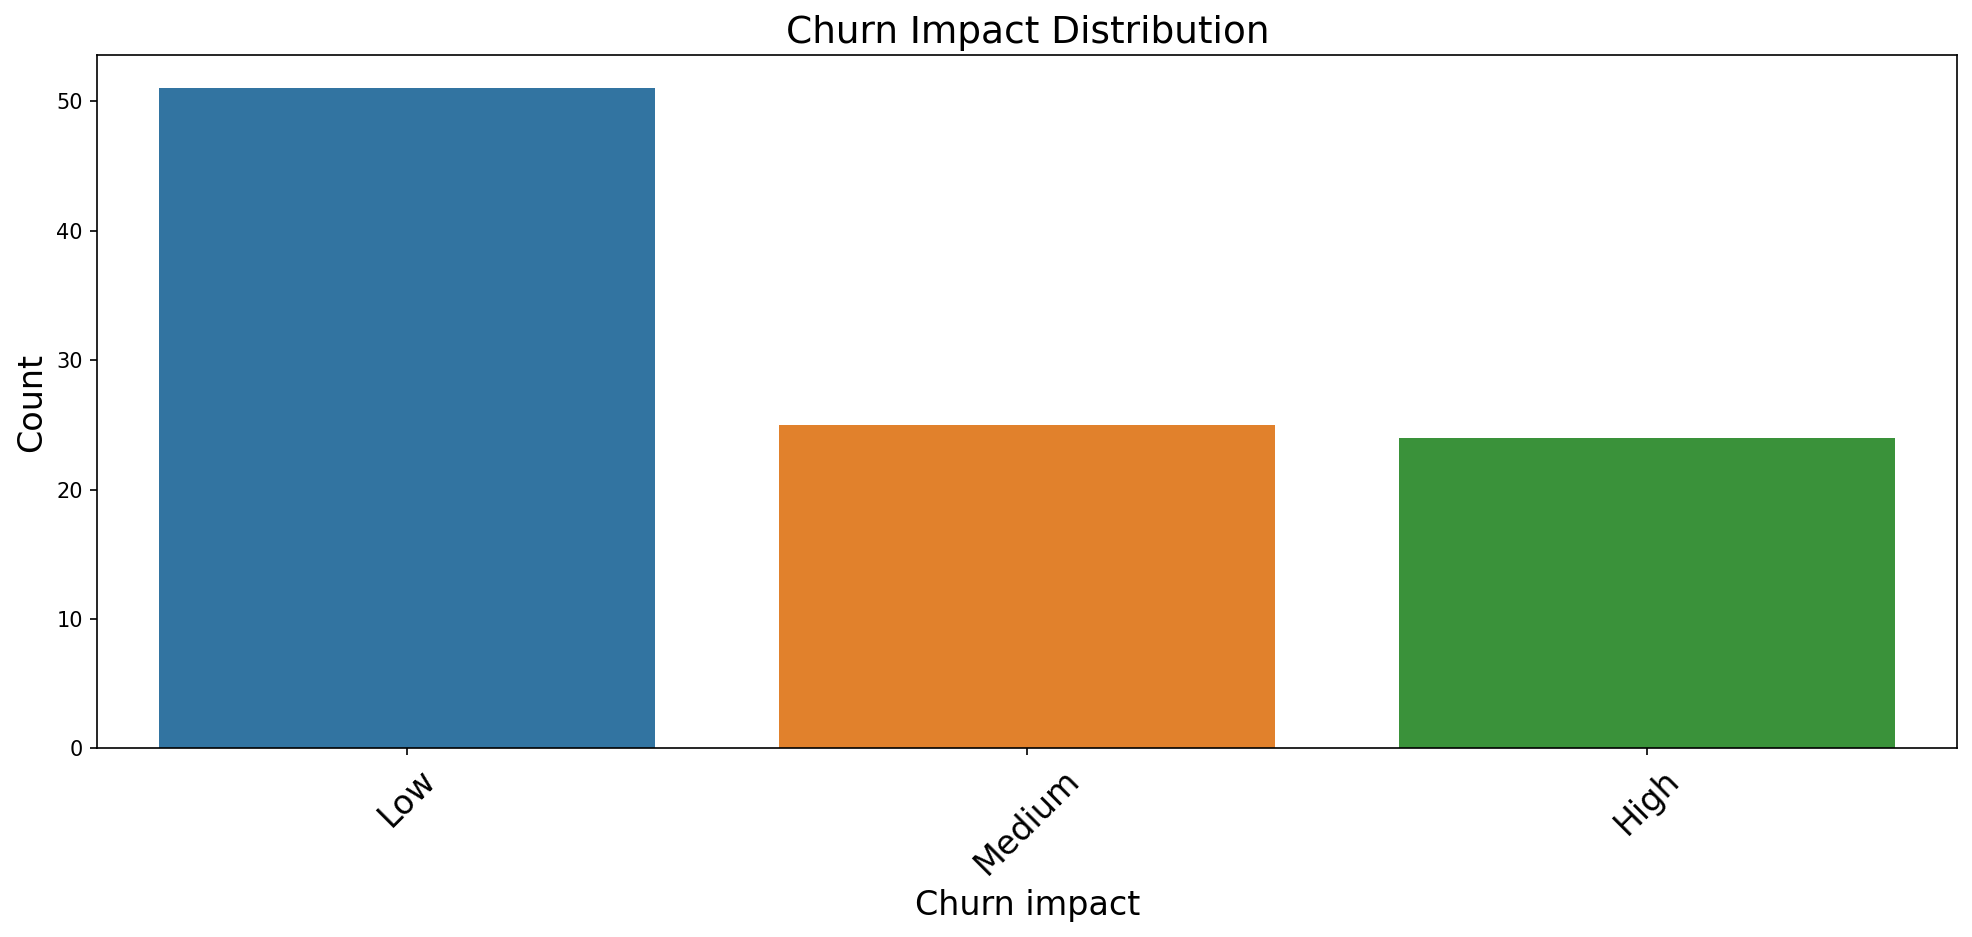

In [18]:
plt.figure(figsize=(16, 6), dpi=150)
sns.countplot(data=df, x=df['Churn_Impact'], hue='Churn_Impact')
plt.xticks(rotation=45, fontsize=16)
plt.xlabel('Churn impact', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Churn Impact Distribution', fontsize=18)

plt.show()

In [23]:
condition = [
    (df['Price'] > 48000) & (df['Churn'] == 0),
    (df['Price'] >= 48000) & (df['Price'] <= 52000) & (df['Churn'] == 1)
]
choice = ['Low', 'Moderate']

df['Risk_Profile'] = np.select(condition, choice, default='High')
df[['Price', 'Churn', 'Risk_Profile']].head(2)

,Price,Churn,Risk_Profile
Date,,,
2023-01-01,48516.342953,0,Low
2023-01-02,46125.735447,0,High


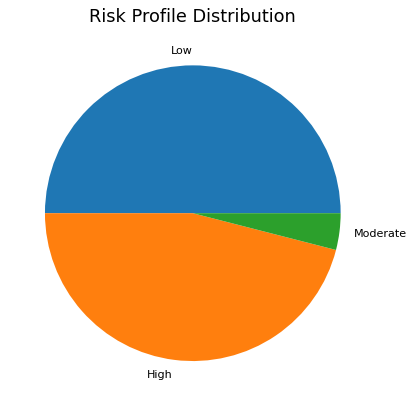

In [30]:
plt.figure(figsize=(8, 6), dpi=80)
plt.pie(
    df['Risk_Profile'].value_counts(),
    labels=df['Risk_Profile'].value_counts().index
)
plt.title('Risk Profile Distribution', fontsize=16)
plt.show()

In [26]:
df['Risk_Profile'].value_counts()

Risk_Profile
Low         50
High        46
Moderate     4
Name: count, dtype: int64

In [28]:
df['Risk_Profile'].value_counts().index

Index(['Low', 'High', 'Moderate'], dtype='object', name='Risk_Profile')